## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

### 2. Load the dataset and display a sample of five rows of the data frame.

In [2]:
heart_df = pd.read_csv("heart_2020_cleaned.csv")
heart_df.sample(5)

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
200953           No  25.68     Yes             Yes     No             3.0   
12959            No  29.86      No              No     No             0.0   
105310           No  29.95      No              No     No             0.0   
290689           No  32.28      No              No     No             0.0   
77091            No  36.49     Yes              No     No             0.0   

        MentalHealth DiffWalking     Sex AgeCategory   Race  \
200953           0.0          No    Male       35-39  White   
12959            0.0          No  Female       35-39  Other   
105310           0.0          No  Female       35-39  White   
290689           2.0          No  Female       65-69  White   
77091            2.0          No    Male       70-74  White   

                       Diabetic PhysicalActivity  GenHealth  SleepTime Asthma  \
200953                       No              Yes       Good        7.0     No   
12959                        No              Yes  Very good        8.0     No   
105310                       No              Yes  Excellent        8.0     No   
290689                      Yes              Yes  Very good        7.0     No   
77091   No, borderline diabetes               No       Good        7.0     No   

       KidneyDisease SkinCancer  
200953            No         No  
12959             No         No  
105310            No         No  
290689            No         No  
77091             No         No

### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [3]:
heart_df.shape

(319795, 18)

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

  -  The Above Output shows that the provided datadrame have 319795 entries with 18 columns.
  -  The Provided dataframe have a total of 14 object datatype and 4 float datatype.

### 4. Check the statistical summary of the dataset and write your inferences.

In [5]:
heart_df.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [6]:
heart_df.describe(include='O')

HeartDisease Smoking AlcoholDrinking  Stroke DiffWalking     Sex  \
count        319795  319795          319795  319795      319795  319795   
unique            2       2               2       2           2       2   
top              No      No              No      No          No  Female   
freq         292422  187887          298018  307726      275385  167805   

       AgeCategory    Race Diabetic PhysicalActivity  GenHealth  Asthma  \
count       319795  319795   319795           319795     319795  319795   
unique          13       6        4                2          5       2   
top          65-69   White       No              Yes  Very good      No   
freq         34151  245212   269653           247957     113858  276923   

       KidneyDisease SkinCancer  
count         319795     319795  
unique             2          2  
top               No         No  
freq          308016     289976

-  The minimum and maximum value of Body Mass Index(BMI) is 12.02 and 94.85.
-  We are also able to observe the mean, standard deviation, min-max values of numerical data from the summary.
-  With respect to the categorical data, it is observed that most people from the dataset are healthy and are physically active.
-  Further, female population is more than the males in the given dataset.

### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [7]:
heart_df.isnull().sum()/len(heart_df) * 100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

In [8]:
heart_df.dropna()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0               30.0          No  Female        55-59     White      Yes   
1                0.0          No  Female  80 or older     White       No   
2               30.0          No    Male        65-69     White      Yes   
3                0.0          No  Female        75-79     White       No   
4                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319790           0.0         Yes    Male        60-64  Hispanic      Yes   
319791           0.0          No    Male        35-39  Hispanic       No   
319792           0.0          No  Female        45-49  Hispanic       No   
319793           0.0          No  Female        25-29  Hispanic       No   
319794           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                   Yes  Very good        5.0    Yes            No        Yes  
1                   Yes  Very good        7.0     No            No         No  
2                   Yes       Fair        8.0    Yes            No         No  
3                    No       Good        6.0     No            No        Yes  
4                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319790               No       Fair        6.0    Yes            No         No  
319791              Yes  Very good        5.0    Yes            No         No  
319792              Yes       Good        6.0     No            No         No  
319793               No       Good       12.0     No            No         No  
319794              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

 - The given dataframe does not contain any missing values in the column.

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [9]:
duplicate = len(heart_df[heart_df.duplicated()])

print(f'The number of duplicate rows is: {duplicate} ')

The number of duplicate rows is: 18078 


In [10]:
heart_df.drop_duplicates(inplace = True)
new = heart_df.shape
print(f'After dropping the duplicate rows,now we have {new} as the new shape of the dataframe')

After dropping the duplicate rows,now we have (301717, 18) as the new shape of the dataframe


### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

In [11]:
hd_dist = heart_df['HeartDisease'].value_counts()
hd_dist

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

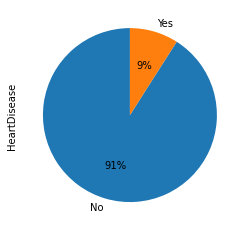

In [12]:
hd_dist.plot(kind = 'pie', autopct = '%1.0f%%', startangle = 90)
plt.show()

 - From the plot, it is clear that the percentage of people suffereing from heart-disease are lesser than others.
 - About 9% of people are suffering from heart-disease which is about (1/10)th of the total data in the provied dataframe.

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [13]:
dist = heart_df.select_dtypes(include=[np.object])
dist.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

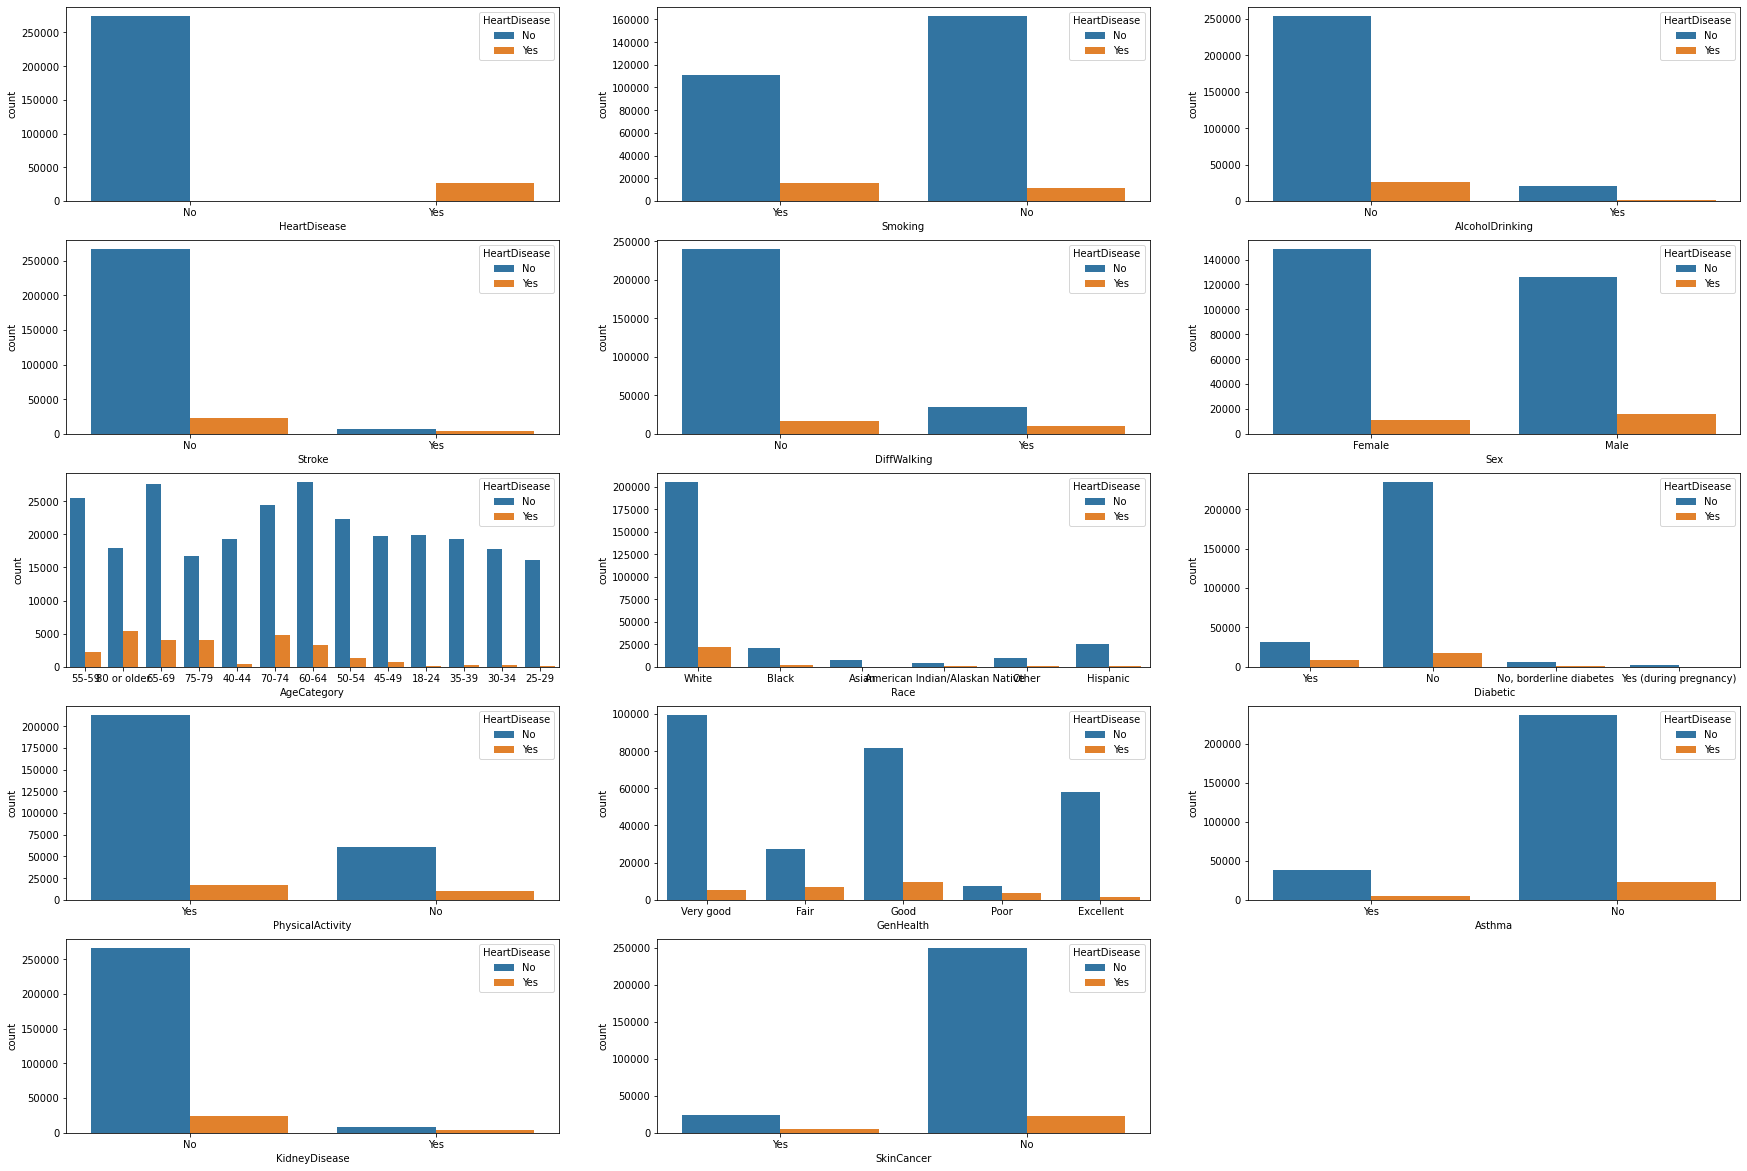

In [14]:
plt.figure(1, figsize = (30,25))
i = 1
for column in dist:
    plt.subplot(6,3,i)
    sns.countplot(data = heart_df, x = column, hue = 'HeartDisease')
    i += 1

 - From the above subplots, it is observed that people suffering from heart disease are lesser in comparison to the given dataset.
 - People with smoking habits are more susceptible to heart disease than the non-smokers.
 - Alcohol drinkers are not suffering from heart-disease in comparison to those non-drinkers.
 - people with stroke are not suffering from heart-disease in comparison to those who does not have stroke.
 - Those who have diffwalking suffer less from heart-disease than those who does not have diffwalking.
 - Male are more susceptible to heart-disease than females.
 - The highest affected heart-disease among people fall between the age category of 80-or-old and 70-74.
 - White people are highly suffering from heart disease and others races have negligible or no affected people.
 - people who does not have diabetic,Asthma,KidneyDisease,and skin cancer suffer from heart-disease than those who have those.
 - No. of Physically active people suffering from heart disease is more than those from inactive people
 - People with their general health rated as 'Good' have more number of heart disease patients and very less number is found        among  people rated 'Excellent'

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [15]:
heart_df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [16]:
heart_df['Diabetic'] = heart_df['Diabetic'].replace({'Yes (during pregnancy)':'Yes','No, borderline diabetes':'No'})
heart_df['Diabetic'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
heart_df['Diabetic'].value_counts()

No     258572
Yes     43145
Name: Diabetic, dtype: int64

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [18]:
heart_df['HeartDisease'].value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

In [19]:
heart_df['HeartDisease'] = heart_df['HeartDisease'].replace({'Yes':1,'No':0})

heart_df['HeartDisease'].value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [20]:
enc = [i for i in heart_df[[ 'AgeCategory','Race','GenHealth']] if heart_df.dtypes[i] == object]
enc

le = LabelEncoder()

def encoder(heart_df):
    for i in enc:
        q = le.fit_transform(heart_df[i].astype(str))
        heart_df[i]=q
        heart_df[i]=heart_df[i].astype(int)
encoder(heart_df)

In [21]:
heart_df = pd.get_dummies(heart_df,drop_first=True)

In [22]:
heart_df.sample(5)

HeartDisease    BMI  PhysicalHealth  MentalHealth  AgeCategory  Race  \
166200             1  28.59             0.0           0.0            9     5   
222639             0  35.52             5.0           0.0           11     5   
137102             0  25.80             0.0           2.0            7     5   
314918             0  27.89             0.0           0.0            1     4   
159638             0  23.91             0.0           0.0            4     5   

        GenHealth  SleepTime  Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  \
166200          4        8.0            0                    0           0   
222639          2        7.0            1                    0           0   
137102          0        7.0            0                    0           0   
314918          0        7.0            1                    0           0   
159638          4        8.0            0                    0           0   

        DiffWalking_Yes  Sex_Male  Diabetic_Yes  PhysicalActivity_Yes  \
166200                0         1             0                     1   
222639                0         0             0                     0   
137102                0         1             0                     1   
314918                0         1             0                     1   
159638                0         0             0                     0   

        Asthma_Yes  KidneyDisease_Yes  SkinCancer_Yes  
166200           0                  0               0  
222639           0                  0               0  
137102           0                  0               0  
314918           0                  0               0  
159638           0                  0               0

### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [23]:
X = heart_df.drop('HeartDisease',axis=1)
y = heart_df['HeartDisease']

In [24]:
X.head()

BMI  PhysicalHealth  MentalHealth  AgeCategory  Race  GenHealth  \
0  16.60             3.0          30.0            7     5          4   
1  20.34             0.0           0.0           12     5          4   
2  26.58            20.0          30.0            9     5          1   
3  24.21             0.0           0.0           11     5          2   
4  23.71            28.0           0.0            4     5          4   

   SleepTime  Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  DiffWalking_Yes  \
0        5.0            1                    0           0                0   
1        7.0            0                    0           1                0   
2        8.0            1                    0           0                0   
3        6.0            0                    0           0                0   
4        8.0            0                    0           0                1   

   Sex_Male  Diabetic_Yes  PhysicalActivity_Yes  Asthma_Yes  \
0         0             1                     1           1   
1         0             0                     1           0   
2         1             1                     1           1   
3         0             0                     0           0   
4         0             0                     1           0   

   KidneyDisease_Yes  SkinCancer_Yes  
0                  0               1  
1                  0               0  
2                  0               0  
3                  0               1  
4                  0               0

In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int64

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_train.shape)

(211201, 17) (90516, 17)
(211201,) (211201,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [27]:
ss = StandardScaler()

X_train.iloc[:,:7]=ss.fit_transform(X_train.iloc[:,:7])
X_test.iloc[:,:7]=ss.transform(X_test.iloc[:,:7])

In [28]:
X_train.head(5)

BMI  PhysicalHealth  MentalHealth  AgeCategory      Race  \
188627 -0.516354       -0.439337     -0.507179     1.251880  0.512361   
301971  2.203127       -0.439337      0.724062     0.694199  0.512361   
203082  0.842614       -0.439337     -0.507179    -0.700004 -1.920700   
156541 -0.861120        1.279882     -0.260931     0.973039  0.512361   
88990  -0.401947       -0.193735     -0.260931    -0.421163  0.512361   

        GenHealth  SleepTime  Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  \
188627  -1.469684  -0.057969            0                    0           0   
301971  -0.146465   0.623187            0                    0           0   
203082  -1.469684  -0.739125            0                    0           0   
156541  -0.808075   0.623187            1                    0           0   
88990   -0.146465   0.623187            1                    0           0   

        DiffWalking_Yes  Sex_Male  Diabetic_Yes  PhysicalActivity_Yes  \
188627                0         1             0                     1   
301971                1         0             0                     1   
203082                0         0             0                     0   
156541                0         1             1                     0   
88990                 0         0             0                     1   

        Asthma_Yes  KidneyDisease_Yes  SkinCancer_Yes  
188627           0                  0               1  
301971           0                  0               0  
203082           1                  0               0  
156541           1                  0               0  
88990            0                  0               0

In [29]:
X_test.head(5)

BMI  PhysicalHealth  MentalHealth  AgeCategory      Race  \
249747  0.081963       -0.439337     -0.507179    -0.142323 -1.920700   
196201  2.503059       -0.193735      1.955304     0.136518  0.512361   
228204 -0.836384        0.788676     -0.507179     0.973039  0.512361   
65497  -0.085009       -0.439337     -0.507179    -1.257685  0.512361   
153926  0.511762       -0.439337     -0.507179    -0.421163 -1.920700   

        GenHealth  SleepTime  Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  \
249747  -0.146465  -0.739125            0                    0           0   
196201  -0.146465   0.623187            0                    0           0   
228204  -0.808075   2.666656            1                    0           0   
65497    1.176754  -0.057969            0                    0           0   
153926  -0.808075   0.623187            0                    0           0   

        DiffWalking_Yes  Sex_Male  Diabetic_Yes  PhysicalActivity_Yes  \
249747                0         0             0                     1   
196201                0         0             0                     1   
228204                1         1             1                     0   
65497                 0         0             0                     1   
153926                0         0             0                     0   

        Asthma_Yes  KidneyDisease_Yes  SkinCancer_Yes  
249747           1                  0               0  
196201           0                  0               0  
228204           0                  1               1  
65497            0                  0               0  
153926           0                  0               0

### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [30]:
def fit_n_predict(model, X_train, X_test, y_train, y_test): 
    model.fit(X_train, y_train)
    
    pred=model.predict(X_test)
    
    accuracy = accuracy_score(y_test, pred)
    
    return accuracy 

In [31]:
lr = LogisticRegression()

Lable = 'Logistic Regression'

rs = pd.DataFrame(columns = ['Accuracy'])

rs.loc[Lable] = fit_n_predict(lr,X_train, X_test, y_train, y_test)

rs

Accuracy
Logistic Regression  0.909861

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [32]:
# Initializing the Models

nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf',rf),('knn',knn),('gb',gb),('adb',adb)]
sc = StackingClassifier(estimators = estimators, final_estimator=rf)


In [33]:
result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr,nb,knn,dt,rf,adb,gb,sc],
                            ['Logistic Regression','Naive Bayes','KNN','Descision Tree',
                            'Random Forest','Ada Boost','Gradient Boost','Stacking']):  
    result.loc[model_name] = fit_n_predict(model,X_train, X_test, y_train, y_test)

In [34]:
result

Accuracy
Logistic Regression  0.909861
Naive Bayes          0.840017
KNN                  0.900780
Descision Tree       0.853396
Random Forest        0.898272
Ada Boost            0.910833
Gradient Boost       0.911209
Stacking             0.907077

### Conclusion

Conclusion based on EDA :
 - People who smoke have higher chances of heart disease than no smokers
 - Male are more prone to suffer from heart diseases as compared to females
 - People with age limit in between 55-75 has higher chances of getting heart diseases
 - If person has difficulty in walking or climbing stairs there is a high probability that he or she is suffering from some heart disease
 - There are higher chances of a person having heart disease if he does not have any kidney disease.

Model :
 - We see that the best performing models are Gradient Boost, Adaboost,Logistic Regression and KNN with around 90-91% accuracy.
 - Please note that the target class is highly imbalanced So, accuracy does not holds good for imbalanced data. Accuracy becomes poor measure of evaluation for our classification model in this context.
 - We can further go with evaluating the models based on the different performance metrics such as presicion, recall and F1score and choose the model accordingly.

----
## Happy Learning:)
----